# Assignment 9

REFERRAL CODE: **SIRSS2105**
<br>**SHUBHAM SALOKHE**

Leaf Classification:

The dataset consists approximately 1,584 images of leaf specimens (16 samples each of 99 species) which have been converted to binary black leaves against white backgrounds. Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.
Note that of the original 100 species, we have eliminated one on account of incomplete associated data in the original dataset.

Kaggle Competition Link: https://www.kaggle.com/c/leaf-classification/data

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df_train= pd.read_csv('train.csv.zip')
df_test = pd.read_csv('test.csv.zip')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.8 KB


In [5]:
df_train.head(10)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.00000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.00000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.00000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.00000,0.000000,0.000000,0.001953,0.013672
6,10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.0,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.00000,0.000000,0.000000,0.039062,0.003906
7,11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.0,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.00000,0.037109,0.006836,0.002930,0.036133
8,14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.0,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.00000,0.000000,0.000977,0.033203,0.074219
9,15,Salix_Fragilis,0.000000,0.000000,0.009766,0.037109,0.072266,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.070312,0.013672,0.19238,0.000000,0.074219,0.000000,0.000000


In [6]:
df_train.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [7]:
df_test.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,774.000000,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,1184.500000,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,1583.000000,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


In [8]:
df_train.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

In [9]:
df_test.isnull().sum()

id           0
margin1      0
margin2      0
margin3      0
margin4      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 193, dtype: int64

In [10]:
print(df_train.shape)
print(df_test.shape)

(990, 194)
(594, 193)


In [11]:
df_train.duplicated().sum()

0

In [12]:
df_train['species'].nunique()

99

In [13]:
df_train.columns.values

array(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4',
       'margin5', 'margin6', 'margin7', 'margin8', 'margin9', 'margin10',
       'margin11', 'margin12', 'margin13', 'margin14', 'margin15',
       'margin16', 'margin17', 'margin18', 'margin19', 'margin20',
       'margin21', 'margin22', 'margin23', 'margin24', 'margin25',
       'margin26', 'margin27', 'margin28', 'margin29', 'margin30',
       'margin31', 'margin32', 'margin33', 'margin34', 'margin35',
       'margin36', 'margin37', 'margin38', 'margin39', 'margin40',
       'margin41', 'margin42', 'margin43', 'margin44', 'margin45',
       'margin46', 'margin47', 'margin48', 'margin49', 'margin50',
       'margin51', 'margin52', 'margin53', 'margin54', 'margin55',
       'margin56', 'margin57', 'margin58', 'margin59', 'margin60',
       'margin61', 'margin62', 'margin63', 'margin64', 'shape1', 'shape2',
       'shape3', 'shape4', 'shape5', 'shape6', 'shape7', 'shape8',
       'shape9', 'shape10', 'shape11', 'shape1

code Reffered from other notebook for learning perpose(thanks )

## Data Preparation 

Here we use swiss army knife function to orgnize the data
<br>Also we use label encoding 

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit # we will know about that package while using it

In [15]:
# Label Encoding
def encode(df_train,df_test):
    le = LabelEncoder().fit(df_train.species)
    labels = le.transform(df_train.species) # Species are in stings 
    
    classes = list(le.classes_) #creating list of column names for submission
    
    test_ids = df_test.id # creating variable for IDs
    
    df_train = df_train.drop(['species','id'],axis = 1) #droping columns 
    df_test = df_test.drop(['id'],axis = 1)

    return df_train, labels, classes, test_ids, df_test

df_train, labels, classes, test_ids, df_test = encode(df_train,df_test)

In [16]:
df_train.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [17]:
df_train.shape

(990, 192)

## Stratified TrainTest Split
### why stratified train test split?
Here are relatively large no of classes(columns) available (192 classes/columns for 990 samples/rows).This will ensure we have all classes represented in both the train and test indices.

In [18]:
# labels is our traget columns which is we created by transforming of species colums(LabelEncoding)
labels

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

In [19]:
X = df_train.values
y = labels

In [20]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=5)
>>> sss.get_n_splits(X, y)

10

In [21]:
sss

StratifiedShuffleSplit(n_splits=10, random_state=5, test_size=0.25,
            train_size=None)

In [22]:
for train_index, test_index in sss.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## Classification
we will use 10 classification technique and printing their results. These will perform much better after tuning their Hyperparameters, this gives you a decent ballpark idea.
1. KNeighborsClassifier
2. SVC(Support Vector Classifier)
3. NuSVC(Nu-Support Vector Classification)Similar to SVC but uses a parameter to control the number of support vectors. The implementation is based on libsvm.
4. DecisionTreeClassifier
5. RandomForestClassifier
6. AdaBoostClassifier
7. GradientBoostingClassifier
8. GaussianNB
9. LinearDiscriminantAnalysis
10. QuadraticDiscriminantAnalysis

In [23]:
# importing libraries

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import log_loss

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel='rbf',C = 0.025, probability= True),
    NuSVC(probability = True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

Creating interation for these 10 algorithm and printing result then we select higher algorithm which having high accuracy and less log loss

In [24]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"] # created list 
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train) # fit method for applying algorithm 
    name = clf.__class__.__name__
    
    print("="*30) ### printing = in 30 times
    print(name) ### printing name of algorithm
    
    print('****Results****') 
    train_predictions = clf.predict(X_test)   ### predicting y_predict
    acc = accuracy_score(y_test, train_predictions) # now compairing y predict(train_prediction) with y_test
    print("Accuracy: {:.4%}".format(acc)) ### printing accuracy  with 4 decimal with pecentage mark 
    
    train_predictions = clf.predict_proba(X_test) ### Probability estimates y_predict_probability(train_predictions)
    ll = log_loss(y_test, train_predictions) ### appllying log loss on y_test and y_predict_probability(train_predictions)
    print("Log Loss: {}".format(ll)) ### printing log loss  
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols) ## creating new dataframe with 
                                                                        ## name of log_entry considering name ,
                                                                          ## accuracy score(this score not in pecentage form hence it multiply by 100)
                                                                            ##logloss stored each iteratin value in log_cols
    log = log.append(log_entry) ### append those entry in log 
    
print("="*30)
    

KNeighborsClassifier
****Results****
Accuracy: 85.0806%
Log Loss: 2.292237960614431
SVC
****Results****
Accuracy: 33.8710%
Log Loss: 4.619940969848444
NuSVC
****Results****
Accuracy: 88.7097%
Log Loss: 2.4892935496943394
DecisionTreeClassifier
****Results****
Accuracy: 63.3065%
Log Loss: 12.673502628777808
RandomForestClassifier
****Results****
Accuracy: 97.9839%
Log Loss: 0.8186334416270421
AdaBoostClassifier
****Results****
Accuracy: 2.8226%
Log Loss: 4.5360387337325445
GradientBoostingClassifier
****Results****
Accuracy: 64.1129%
Log Loss: 2.574118879013752
GaussianNB
****Results****
Accuracy: 54.4355%
Log Loss: 15.737426341229568
LinearDiscriminantAnalysis
****Results****
Accuracy: 97.1774%
Log Loss: 0.44611918340420015
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 3.2258%
Log Loss: 33.4246223176556


C:\Users\SHUBHAM\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


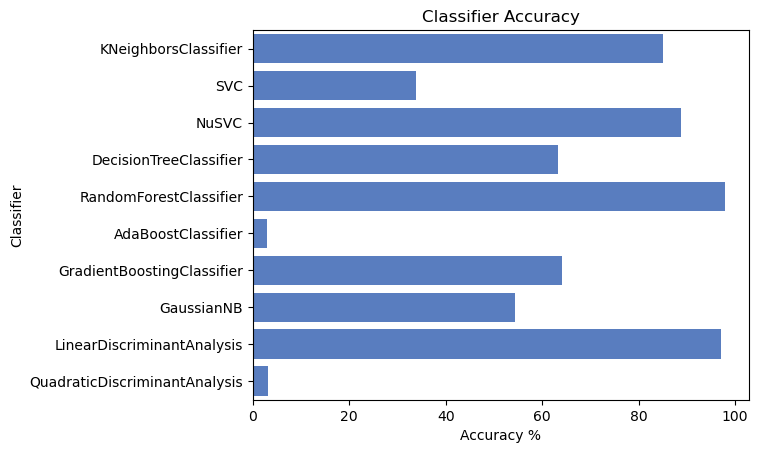

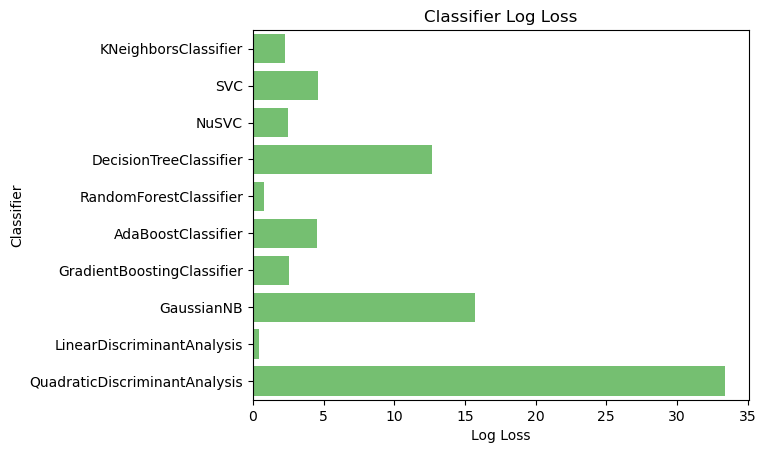

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_color_codes("muted")
sns.barplot(y='Classifier', x='Accuracy', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [26]:
log.head(10)

,Classifier,Accuracy,Log Loss
0,KNeighborsClassifier,85.080645,2.292238
0,SVC,33.870968,4.619941
0,NuSVC,88.709677,2.489294
0,DecisionTreeClassifier,63.306452,12.673503
0,RandomForestClassifier,97.983871,0.818633
0,AdaBoostClassifier,2.822581,4.536039
0,GradientBoostingClassifier,64.112903,2.574119
0,GaussianNB,54.435484,15.737426
0,LinearDiscriminantAnalysis,97.177419,0.446119
0,QuadraticDiscriminantAnalysis,3.225806,33.424622


Random Forest Classifier has the highest accuracy  also it has less log loss so we choosing Random forest Classifier as our model 

In [27]:
# now predicting test values 
chosen_clf = RandomForestClassifier()
chosen_clf.fit(X_train,y_train)
test_predictions = chosen_clf.predict_proba(df_test)

# Format DataFrame
submission = pd.DataFrame(test_predictions, columns=classes)
submission.insert(0, 'id', test_ids)
submission.reset_index()



,index,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,0,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00
1,1,7,0.00,0.00,0.04,0.01,0.00,0.03,0.05,0.01,...,0.0,0.00,0.00,0.00,0.0,0.03,0.00,0.01,0.0,0.00
2,2,9,0.00,0.50,0.00,0.00,0.06,0.00,0.00,0.00,...,0.0,0.00,0.01,0.00,0.0,0.01,0.00,0.00,0.0,0.01
3,3,12,0.02,0.05,0.00,0.04,0.00,0.00,0.01,0.00,...,0.0,0.00,0.00,0.00,0.0,0.03,0.08,0.00,0.0,0.04
4,4,13,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.01,0.00,0.0,0.00,0.03,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,589,1576,0.00,0.45,0.00,0.00,0.08,0.01,0.00,0.01,...,0.0,0.00,0.00,0.00,0.0,0.00,0.01,0.00,0.0,0.01
590,590,1577,0.00,0.01,0.00,0.02,0.00,0.01,0.00,0.04,...,0.0,0.00,0.01,0.00,0.0,0.00,0.00,0.00,0.0,0.02
591,591,1579,0.00,0.02,0.00,0.00,0.02,0.01,0.00,0.00,...,0.0,0.00,0.00,0.01,0.0,0.00,0.00,0.00,0.0,0.01
592,592,1580,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.00,...,0.0,0.04,0.00,0.02,0.0,0.01,0.00,0.01,0.0,0.00


In [28]:
# saving submission
submission.to_csv('submission.csv', index = False)
submission.tail()

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
589,1576,0.0,0.45,0.00,0.00,0.08,0.01,0.00,0.01,0.02,...,0.0,0.00,0.00,0.00,0.0,0.00,0.01,0.00,0.0,0.01
590,1577,0.0,0.01,0.00,0.02,0.00,0.01,0.00,0.04,0.05,...,0.0,0.00,0.01,0.00,0.0,0.00,0.00,0.00,0.0,0.02
591,1579,0.0,0.02,0.00,0.00,0.02,0.01,0.00,0.00,0.00,...,0.0,0.00,0.00,0.01,0.0,0.00,0.00,0.00,0.0,0.01
592,1580,0.0,0.00,0.01,0.01,0.00,0.00,0.02,0.00,0.00,...,0.0,0.04,0.00,0.02,0.0,0.01,0.00,0.01,0.0,0.00
593,1583,0.0,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.03,...,0.0,0.00,0.00,0.00,0.0,0.00,0.01,0.00,0.0,0.01
